In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import multiprocessing
def loadField(path_load, name_field):
    with h5py.File(path_load, 'r') as f:
        print(f.keys())
        f_arr = np.asarray(f[name_field][()])
        x_arr = f['Mesh line x'][()]
        y_arr = f['Mesh line y'][()]
        z_arr = f['Mesh line z'][()]
        print('Size of field is: ',str(f_arr.shape))
        axis_dict = {'x_arr':x_arr,'y_arr':y_arr,'z_arr':z_arr}
        return f_arr,axis_dict
path_load = './helical_5mm_phantom.h5'
loss_arr,axis_arr = loadField(path_load, 'Power Loss Density')
# x_arr = axis_dict['x_arr']
# y_arr = axis_dict['y_arr']
# z_arr = axis_dict['z_arr']

<KeysViewHDF5 ['Mesh line x', 'Mesh line y', 'Mesh line z', 'Power Loss Density']>
Size of field is:  (401, 451, 451)


In [105]:
!pwd

/mnt/c/Users/koike/Desktop/sim/3d_solve_u


In [8]:
# with open('system.txt','w') as outfile:
#     for data_slice in loss_arr:
#         np.savetxt(outfile, data_slice, fmt='%-7.5f')

In [9]:
ix, jx, kx = loss_arr.shape
endian='<'
a = loss_arr
a.reshape([ix*jx*kx],order='F').astype(endian+'d').tofile('test.dat')

In [6]:
print(ix,jx,kx)

401 451 451


In [12]:
np.max(loss_arr)

582222.1

In [98]:
np.sum(loss_arr)/(401*451*451)*1e-12

3.988339427585039e-09

In [103]:
np.sum(loss_arr)*(1e-12)*20

6.50608246784

In [102]:
np.sum(loss_arr)/(401*451*451)

3988.3394275850387

In [96]:
np.sum(loss_arr_resize)/(80*90*90)

4012.915328057438

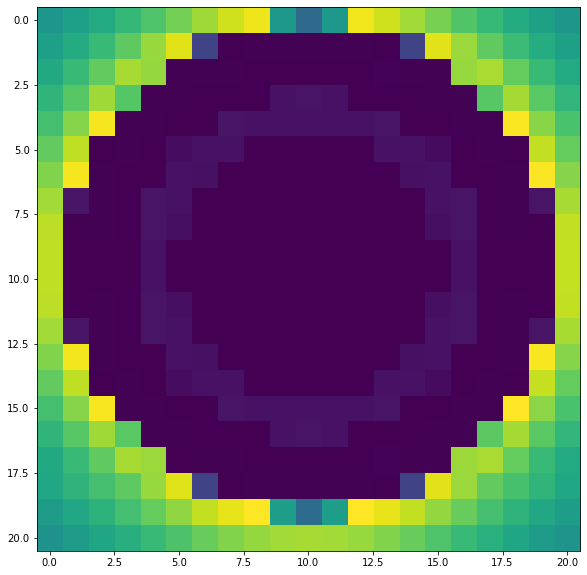

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(loss_arr[201,236:257,215:236])
plt.show()

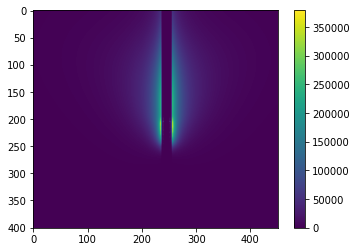

In [13]:
plt.figure()
plt.imshow(loss_arr[:,:,225])
plt.colorbar()
plt.show()

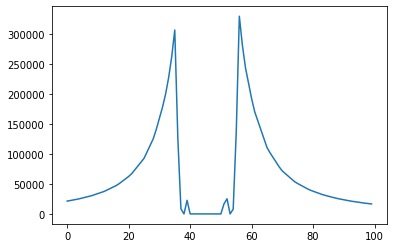

In [16]:
plt.plot(loss_arr[225,200:300,225])
plt.show()

In [59]:
loss_arr_resize = np.zeros((int(ix*0.1),int(jx*0.1),int(kx*0.1)))

In [65]:
loss_arr_resize.shape

(40, 45, 45)

In [ ]:
ratio = 0.1

In [71]:
for i in range(int(ix*0.1)):
    tmp = np.zeros((int(jx*0.1),int(kx*0.1)))
    for j in range(10):
        tmp = tmp + cv2.resize(loss_arr[i*10+j,:,:], dsize=None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    loss_arr_resize[i,:,:] = tmp/10.0

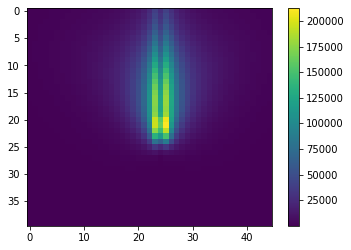

In [73]:
plt.figure()
plt.imshow(loss_arr_resize[:,:,23])
plt.colorbar()
plt.show()

In [74]:
ix_r, jx_r, kx_r = loss_arr_resize.shape
endian='<'
b = loss_arr_resize
b.reshape([ix_r*jx_r*kx_r],order='F').astype(endian+'d').tofile('loss_arr_resize.dat')

In [76]:
np.max(loss_arr_resize)

212252.04375

In [77]:
loss_arr_resize = np.zeros((int(ix*0.2),int(jx*0.2),int(kx*0.2)))

In [94]:
loss_arr_resize.shape

(80, 90, 90)

In [81]:
ratio = 0.2

In [85]:
for i in range(int(ix*ratio)):
    tmp = np.zeros((int(jx*ratio),int(kx*ratio)))
    for j in range(int(1/ratio)):
        tmp = tmp + cv2.resize(loss_arr[int(i/ratio)+j,:,:], dsize=None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    loss_arr_resize[i,:,:] = tmp*ratio

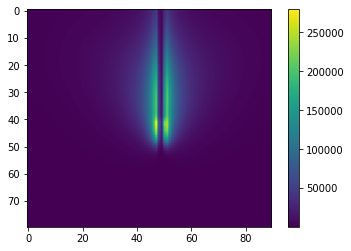

In [90]:
plt.figure()
plt.imshow(loss_arr_resize[:,:,46])
plt.colorbar()
plt.show()

In [91]:
ix_r, jx_r, kx_r = loss_arr_resize.shape
endian='<'
b = loss_arr_resize
b.reshape([ix_r*jx_r*kx_r],order='F').astype(endian+'d').tofile('loss_arr_resize.dat')

In [49]:
import cv2
ratio = 0.1
img_cv2resize = cv2.resize(loss_arr[1,:,:], dsize=None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

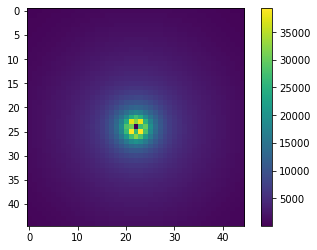

In [50]:
plt.imshow(img_cv2resize)
plt.colorbar()
plt.show()

In [48]:
img_cv2resize.shape

(90, 90)

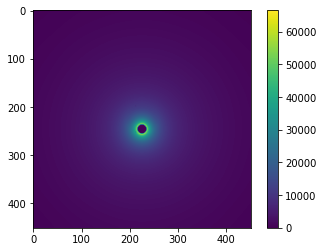

In [42]:
plt.imshow(loss_arr[1,:,:])
plt.colorbar()
plt.show()

In [3]:
!pip install h5py

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.4 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 45.4 MB/s eta 0:00:01
